# RQ4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Top Languages
First, we want to check in what languages most of the reviews are written in. We can do this by grouping the dataset by its `language` column, then by counting how many unique elements (languages) there are by using the `size()` method, and finally by sorting it and slicing the top 3.

In [10]:
def count_languages(df):
    """
    This functions counts how many reviews were written in each of the languages in the dataset
    
    Arguments
        df : pandas dataframe
    Returns
        list of tuples (language, num_of_reviews)
    """
    
    return([(lang, len(frame)) for lang, frame in df.groupby('language')['review_id']])    

def sort_count(count, n = 3, reverse = True):
    """
    This functions sorts and slices a list of tuples 
    e.g. [(a, 1), (b, 3), (c, 2)] —> [(b, 3), (c, 2), (a, 1)]
    
    Arguments
        count : list of tuples
    Returns
        sorted and slices list of tuples
    """
    
    top = sorted(count, key = lambda x: x[1], reverse = reverse)
    
    return(top[:n])

def languages_pie(languages):
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.pie(languages.value_counts(), 
        labels = languages.value_counts().index,
        explode = [0.1 if language > 10000 else 0.05 for language in languages.value_counts()],
        autopct = '%.1f%%')
    plt.show()

def print_top_languages(top_languages):
    """
    This functions prints the top languages
    with the respective number of reviews
    in a nice and readable format
    
    Arguments
        top_languages : list of tuples (e.g [(german, 80), (french, 70), (italian, 60)])
    Returns
        void
    """
    print("The three most common languages are:")
    for lang, num in top_languages:
            print(f"{lang.capitalize()} with {num} reviews")

We can manage to load the whole dataset by only selecting the columns we will need for our analysis.

In [4]:
df = pd.read_csv("data/steam_reviews.csv", 
                 usecols = ['review_id', 'language', 'votes_funny', 'votes_helpful'], 
                 header = 'infer')

### What are the most common languages?

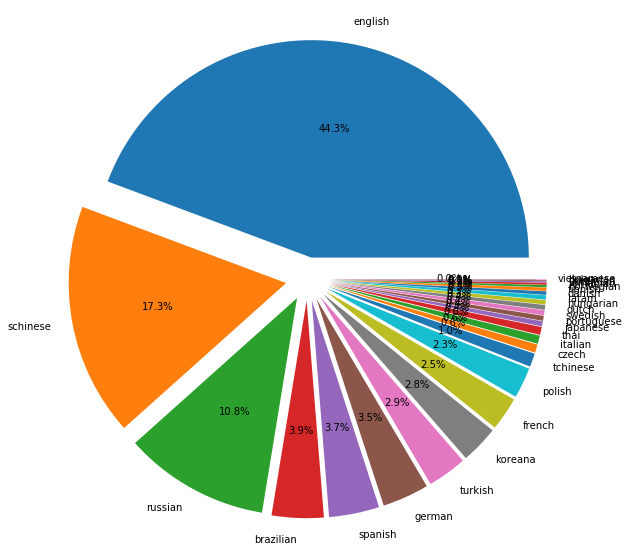

The three most common languages are:
English with 9635437 reviews
Schinese with 3764967 reviews
Russian with 2348900 reviews


In [11]:
languages_pie(df['language'])

top_languages = sort_count(count_languages(df))

print_top_languages(top_languages)

### Now let's filter the dataset so it only includes reviews in these languages

In [6]:
def filter_by_language(df, languages):
    """
    This function filters the dataframe so it only contains reviews
    written in certain languages, and prints the percentage among these
    of those which were considered 'Funny' 
    and of those which were considered 'Helpful'
    
    Arguments:
        df        : pandas dataframe
        languages : list of languages (e.g ['russian', 'english', 'turkish'])
    Returns:
        f_df      : filtered pandas dataframe
    """
    
    f_df = df[df['language'].isin(languages)]
    
    for lang in languages:
        
        f_df_lang = f_df[f_df['language'] == lang]
        
        votes_funny = f_df_lang[f_df_lang['votes_funny'] > 0]['votes_funny'].value_counts().sum()  
        percent_funny = 100 * votes_funny / f_df_lang['votes_funny'].count()
        
        print(f"{percent_funny:.0f}% of the {lang.capitalize()} reviews were considered 'Funny'")

        votes_helpful = f_df_lang[f_df_lang['votes_helpful'] > 0]['votes_helpful'].value_counts().sum()
        percent_helpful = 100 * votes_helpful / f_df_lang['votes_helpful'].count()
        
        print(f"{percent_helpful:.0f}% of the {lang.capitalize()} reviews were considered 'Helpful'")
    
    return f_df

### How did other users consider these reviews: Funny or Helpful?

In [7]:
filtered_df = filter_by_language(df, [language for language, _ in top_languages])

11% of the English reviews were considered 'Funny'
29% of the English reviews were considered 'Helpful'
12% of the Schinese reviews were considered 'Funny'
25% of the Schinese reviews were considered 'Helpful'
17% of the Russian reviews were considered 'Funny'
36% of the Russian reviews were considered 'Helpful'


Generally Russian reviews seem to produce more interactions **among these three languages**, as they were rated more often either 'Funny' or 'Helpful' than the English or Chinese ones, which were rated similarly. 